In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd # for csv.
from matplotlib import cm
from matplotlib.lines import Line2D
import os

In [2]:
fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv.gz'
slice_ = 350
theta0 = -15.0*np.pi/180

#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate2_cell_by_gene_S1R2.csv.gz'
#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate3_cell_by_gene_S1R3.csv.gz'

#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_by_gene_S2R1.csv.gz'
#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate2_cell_by_gene_S2R2.csv.gz'
#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate3_cell_by_gene_S2R3.csv.gz'

#fname = '/mnt/data/merfish/OneDrive_1_8-5-2021/datasets_mouse_brain_map_BrainReceptorShowcase_Slice3_Replicate1_cell_by_gene_S3R1.csv.gz'


In [3]:
df = pd.read_csv(fname.replace('by_gene','metadata'))
df

,Unnamed: 0,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y
0,110883424764611924400221639916314253469,0,432.141425,156.563284,4271.326432,151.530484,161.596084,4264.619632,4278.033232
1,135188247894899244046039873973964001182,0,1351.802616,156.509284,4256.962431,148.290484,164.728084,4247.663631,4266.261232
2,164766962839370328502017156371562646881,0,1080.653268,159.965284,4228.180431,152.178484,167.752084,4220.555630,4235.805231
3,165747897693809971960756442245389760838,0,1652.000749,167.579284,4323.868433,158.226484,176.932084,4314.191633,4333.545233
4,260943245639750847364278545493286724628,0,1343.378642,160.559284,4308.802433,152.394484,168.724084,4301.231633,4316.373233
...,...,...,...,...,...,...,...,...,...
78324,165273009496786595275688065919008183969,1225,1159.623218,9154.007886,4445.528506,9143.953086,9164.062686,4435.473706,4455.583306
78325,250474226357477911702383283537224741401,1225,1058.062257,9088.829884,4423.712505,9081.097084,9096.562685,4416.249705,4431.175306
78326,66106840181174834341279408890707577820,1225,1155.306779,9170.261887,4431.758506,9159.613086,9180.910687,4421.217705,4442.299306
78327,66165211106933093510165165316573672348,1225,394.808108,9086.183884,4417.016505,9081.745084,9090.622685,4412.253705,4421.779305


In [4]:
x = np.array(df['center_x'])
y = np.array(df['center_y'])
v = np.array(df['volume'])
N = x.shape[0]

In [5]:
mat = np.array([[9.20788192749023E+00, 0E+00, -3.77225189208984E+02],
                [0E+00, 9.20783615112305E+00, 9.39383850097656E+02],
                [0E+00, 0E+00, 1E+00 ]])
mat = np.eye(3)

In [6]:
xy = np.stack((x,y),0)
xy = mat[:2,:2]@xy + mat[:2,-1][:,None]
x,y = xy

<IPython.core.display.Javascript object>


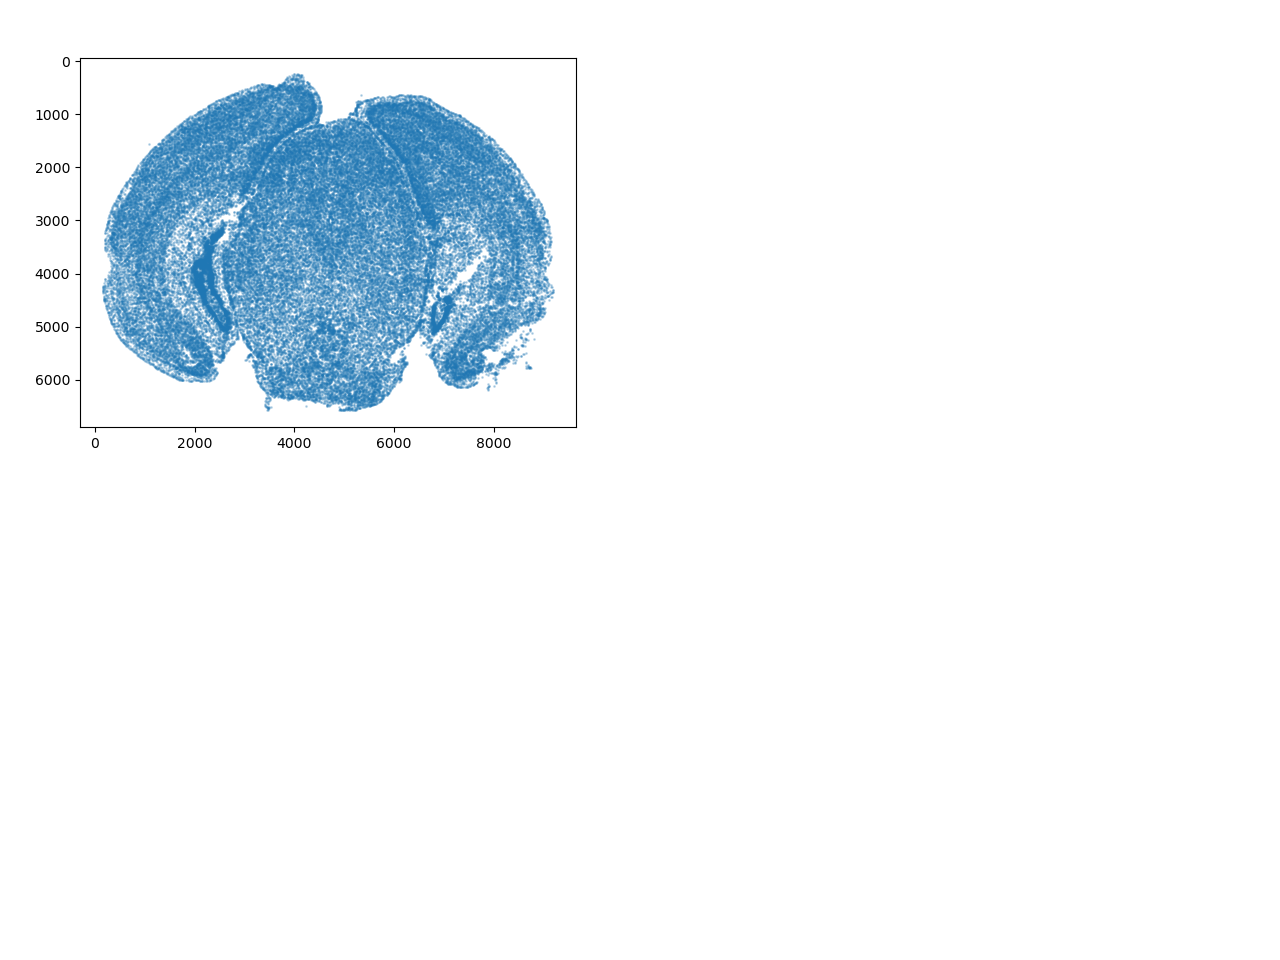

In [7]:
f,ax = plt.subplots()
ax.scatter(x,y,s=1,alpha=0.25)
ax.invert_yaxis()
# what are the units in xy
# they should be microns
# they're probably pixel, the conversion factor is
f.canvas.draw()

In [8]:
# now we want to rasterize
minx = np.min(x)
maxx = np.max(x)
miny = np.min(y)
maxy = np.max(y)
expand = 1.1
minx,maxx = (minx+maxx)/2.0 - (maxx-minx)/2.0*expand, (minx+maxx)/2.0 + (maxx-minx)/2.0*expand
miny,maxy = (miny+maxy)/2.0 - (maxy-miny)/2.0*expand, (miny+maxy)/2.0 + (maxy-miny)/2.0*expand

dx = 50 # I will register to 50 micron atlas
X_ = np.arange(minx,maxx,dx)
Y_ = np.arange(miny,maxy,dx)
X = np.stack(np.meshgrid(X_,Y_))
blur = 0.75 # gaussian std in voxels
blur = 1.0
W = np.zeros((len(Y_),len(X_)))
print(W.shape)

(140, 199)


<IPython.core.display.Javascript object>


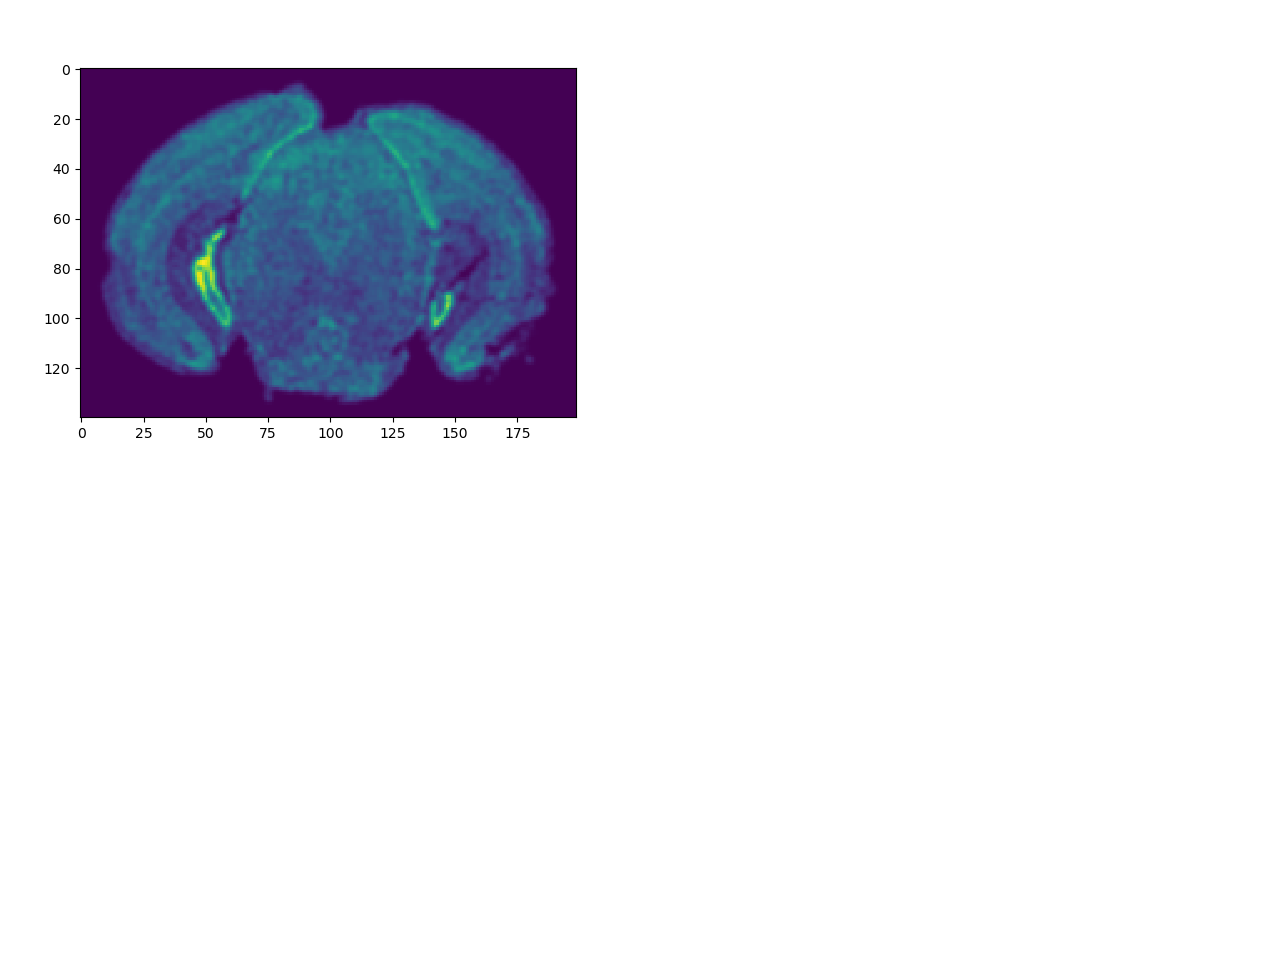

0 of 78329
10000 of 78329
20000 of 78329
30000 of 78329
40000 of 78329
50000 of 78329
60000 of 78329
70000 of 78329
78328 of 78329


In [9]:
f,ax = plt.subplots()
count = 0
for x_,y_ in zip(x,y):
    # to speed things up I shoul index
    # to do this I'd have to find row and column indices
    col = np.round((x_ - X_[0])/dx).astype(int)
    row = np.round((y_ - X_[1])/dx).astype(int)
    row0 = np.floor(row-blur*3).astype(int)
    row1 = np.ceil(row+blur*3).astype(int)
    rows = np.arange(row0,row1+1)
    #asdf
    #rows = np.arange(row,row+blur*3+1)
    #rows_ = np.arange(row,row-blur*3-1,-1)
    #rows__ = np.concatenate((rows_[::-1],rows[1:])).astype(int)
    #cols = np.arange(col,col+blur*3+1)
    #cols_ = np.arange(col,col-blur*3-1,-1)
    #cols__ = np.concatenate((cols_[::-1],cols[1:])).astype(int)
    
    ## this step is incrementing one pixel at a time, it is way way faster
    #I[c_,row,col] += 1.0
    #W[row,col] += 1.0
    
    k = np.exp( - ( (X[0] - x_)**2 + (X[1] - y_)**2 )/(2.0*(dx*blur)**2)  )
    k /= np.sum(k)
    #I[c_] += k 
    W += k
    
    if not count%10000 or count==(x.shape[0]-1):
        print(f'{count} of {x.shape[0]}')
        
        ax.cla()
        ax.imshow(W)
        f.canvas.draw()
    
    count += 1


In [10]:
extent = (X_[0],X_[-1],Y_[0],Y_[-1])

In [11]:
# start by loading the atlas
import nrrd
imagefile = '/home/dtward/data/AllenInstitute/ara_nissl/ara_nissl_50.nrrd'
vol,hdr = nrrd.read(imagefile)
A = vol
#f,ax = plt.subplots()
#ax.imshow(A[50])

labelfile = '/home/dtward/data/AllenInstitute/mouse_ccf/annotation/ccf_2017/annotation_50.nrrd'
vol,hdr = nrrd.read(labelfile)
L = vol
#f,ax = plt.subplots()
#ax.imshow(L[50]%7)

dxA = np.diag(hdr['space directions'])
nxA = A.shape
xA = [np.arange(n)*d - (n-1)*d/2.0 for n,d in zip(nxA,dxA)]
XA = np.meshgrid(*xA,indexing='ij')


In [12]:
f,ax = plt.subplots()
ax.imshow(A[slice_//2],extent=[xA[2][0],xA[2][-1],xA[1][0],xA[1][-1]])

<IPython.core.display.Javascript object>

In [13]:
# now we will use torch
import torch
from torch.nn.functional import grid_sample
# build an interp function from grid sample
def interp(x,I,phii,**kwargs):
    '''
    Interpolate the image I, with regular grid positions stored in x (1d arrays),
    at the positions stored in phii (3D arrays with first channel storing component)
    '''
    # first we have to normalize phii to the range -1,1    
    I = torch.as_tensor(I)
    phii = torch.as_tensor(phii)
    phii = torch.clone(phii)
    for i in range(3):
        phii[i] -= x[i][0]
        phii[i] /= x[i][-1] - x[i][0]
    # note the above maps to 0,1
    phii *= 2.0
    # to 0 2
    phii -= 1.0
    # done
        
    # NOTE I should check that I can reproduce identity
    # note that phii must now store x,y,z along last axis
    # is this the right order?
    # I need to put batch (none) along first axis
    # what order do the other 3 need to be in?    
    out = grid_sample(I[None],phii.flip(0).permute((1,2,3,0))[None],align_corners=True,**kwargs)
    # note align corners true means square voxels with points at their centers
    # post processing, get rid of batch dimension
    
    return out[0]

In [14]:
dtype = torch.float
device = 'cpu'

I = torch.as_tensor(A[None]/np.mean(np.abs(A)),dtype=dtype,device=device)
J = torch.as_tensor(W[None,None]/np.mean(np.abs(W)),dtype=dtype,device=device)
xI = [torch.as_tensor(x,dtype=dtype,device=device) for x in xA]
xJ = [torch.as_tensor([0.0],device=device,dtype=dtype),
      torch.as_tensor(Y_,device=device,dtype=dtype),
      torch.as_tensor(X_,device=device,dtype=dtype)]
XJ = torch.stack(torch.meshgrid(xJ),-1)
XI = torch.stack(torch.meshgrid(xI),-1)

In [15]:
# velocity
dI = torch.tensor([x[1]-x[0] for x in xI])
#xv = [x[::2] for x in xI]
#dv = torch.tensor([x[1]-x[0] for x in xv])
dv = dI*3
buf = 20
xv = [torch.arange(x[0]-dIi*buf,x[-1]+dIi*buf,dvi) for x,dIi,dvi in zip(xI,dI,dv)]
a = dv[0]*3.0
p = 2.0
nv = torch.tensor([len(x) for x in xv])
XV = torch.stack(torch.meshgrid(xv),-1)
fv = [torch.arange(n)/d/n for n,d in zip(nv,dv)]
FV = torch.stack(torch.meshgrid(fv),-1)
LL = (1.0 - 2.0*a**2 * 
              ( (torch.cos(2.0*np.pi*FV[...,0]*dv[0]) - 1)/dv[0]**2  
            + (torch.cos(2.0*np.pi*FV[...,1]*dv[1]) - 1)/dv[1]**2  
            + (torch.cos(2.0*np.pi*FV[...,2]*dv[2]) - 1)/dv[2]**2   ) )**(p*2)
K = 1.0/LL

In [16]:
# timesteps will be along the first axis
def v_to_phii(xv,v):
    '''
    Inputs: 
        xv -> list of 1D tensors describing locations of sample points
        v -> 5D (nt,3,v0,v1,v2) velocity field
    Output:
        phii (inverse map) computed by method of characteristics
    
    '''
    XV = torch.stack(torch.meshgrid(xv))
    phii = torch.clone(XV)
    dt = 1.0/v.shape[0]
    for t in range(v.shape[0]):
        Xs = XV - v[t]*dt
        phii = interp(xv,phii-XV,Xs)+Xs
    return phii

In [17]:
XI.shape

torch.Size([264, 160, 228, 3])

In [18]:
# metric
# we'll use the pullback on the points in the atlas
g = torch.zeros((12,12))
count = 0
for i in range(12):
    Ei = (torch.arange(16)==i).reshape((4,4))*1.0
    EiXI = (Ei[:3,:3]@XI[...,None])[...,0] + Ei[:3,-1]
    for j in range(12):
        Ej = (torch.arange(16)==j).reshape((4,4))*1.0
        EjXI = (Ej[:3,:3]@XI[...,None])[...,0] + Ej[:3,-1]
        g[i,j] = torch.mean(torch.sum(EiXI*EjXI,-1))
        
        
    
        

In [19]:
gi = torch.inverse(g)

In [20]:
f,ax = plt.subplots()
ax.imshow(g)
#ax.imshow(torch.log(torch.abs(g))*torch.sign(g))

<IPython.core.display.Javascript object>

In [21]:
f,ax = plt.subplots()
ax.imshow(gi)
#ax.imshow(torch.log(torch.abs(g))*torch.sign(g))

<IPython.core.display.Javascript object>

In [22]:
# affine matrix 
L = torch.eye(3,device=device, dtype=dtype, requires_grad=True)
#L.data[1,1] = -1

L.data[1,1] = np.cos(theta0)
L.data[2,1] = np.sin(theta0)
L.data[1,2] = -np.sin(theta0)
L.data[2,2] = np.cos(theta0)
    
T = torch.zeros(3,device=device,dtype=dtype, requires_grad=True)
T.data[0] = -xI[0][350//2]
T.data[1] = 4000
T.data[2] = 5000
#T.data[2] = 6000 # less good but double checking T
#L.data = torch.tensor([[ 0.9997, -0.0089, -0.0033],
#        [ 0.0017, -0.8628, -0.2064],
#        [-0.0044, -0.2312,  0.8307]])
#T.data = torch.tensor([ -166.5568, -3948.2505,  4890.3770])
O = torch.tensor([0.,0.,0.,1.],device=device,dtype=dtype)

def to_A(L,T):
    return torch.cat((torch.cat((L,T[:,None]),1),O[None]))

In [23]:
nt = 2
v = torch.zeros((nt,nv[0],nv[1],nv[2],3),requires_grad=True)

<IPython.core.display.Javascript object>


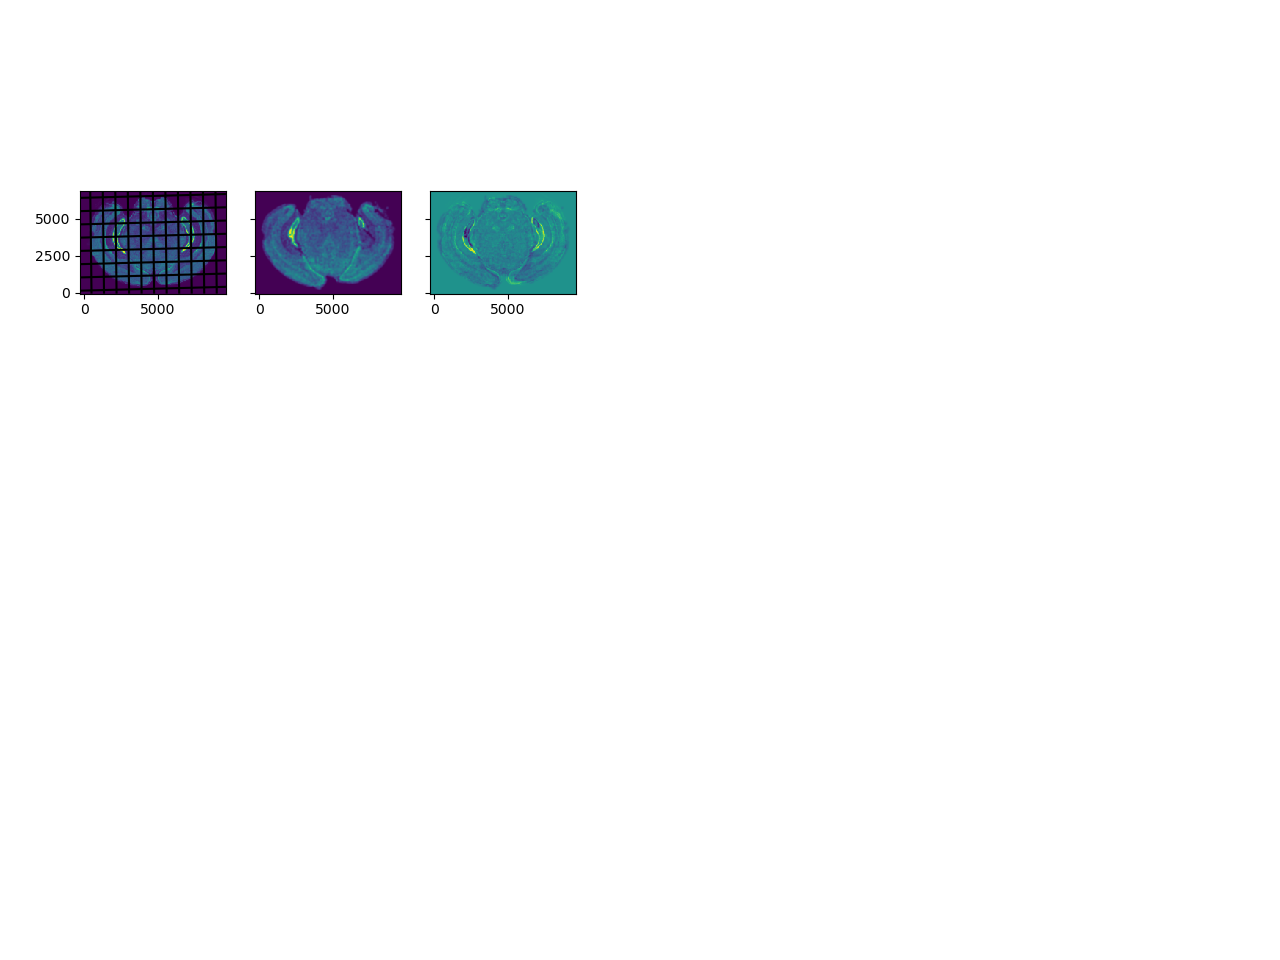

<IPython.core.display.Javascript object>


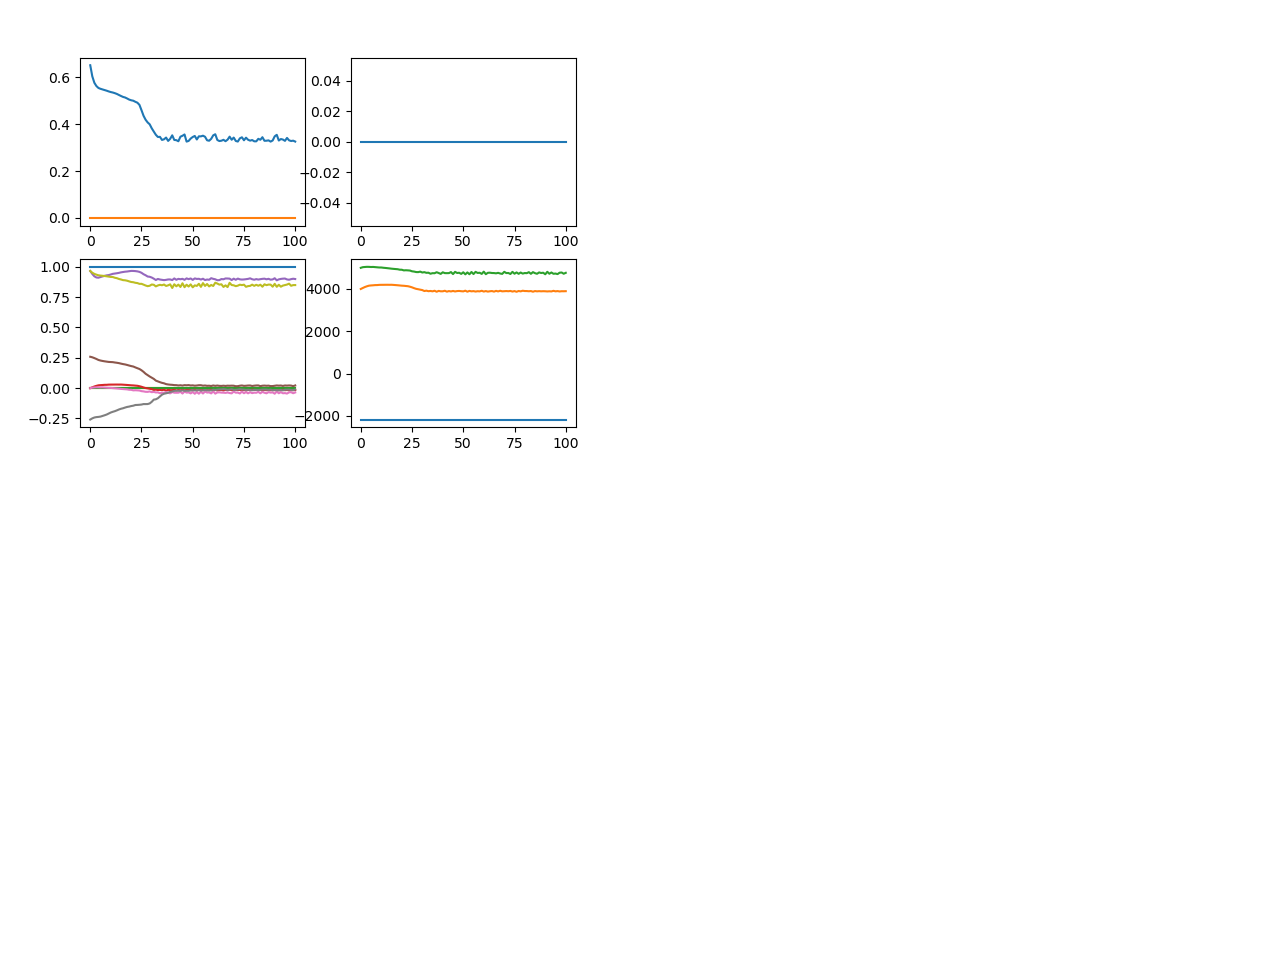

/home/dtward/.local/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: No contour levels were found within the data range.


KeyboardInterrupt: 

In [24]:
f0,ax0 = plt.subplots(1,3,sharex=True,sharey=True)
f1,ax1 = plt.subplots(2,2)
ax1 = ax1.ravel()

# optimization
niter = 1000
eL = 1e-2
eT = 1e5
eA = 2e5
ev = 1e9
start3d = 250
startdiff = 300
#niter = 300
sigmaR = 1e9

Esave = []
ERsave = []
Tsave = []
Lsave = []
for it in range(niter):
    # generate
    phii = v_to_phii(xv,v.permute(0,4,1,2,3))
    # apply affine transform to atlas
    A = to_A(L,T)
    # invert
    Ai = torch.inverse(A)
    # sample points
    Xs = (Ai[:3,:3]@XJ[...,None])[...,0] + Ai[:3,-1]
    
    # compose
    Xs = (interp(xv,phii-XV.permute(3,0,1,2),Xs.permute(3,0,1,2)) + Xs.permute(3,0,1,2)).permute(1,2,3,0)
    
    # transform atlas
    AI = interp(xI,I,Xs.permute(3,0,1,2))
    # contrast
    AI0 = AI - torch.mean(AI)
    if it == 0:
        Jbar = torch.mean(J)
        J0 = J - Jbar
    fAI = AI0 * torch.mean(AI0*J0) / torch.mean(AI0**2) + Jbar
    # cost
    err = fAI-J
    E = torch.mean(err**2)
    vhat = torch.rfft(v.permute(0,4,1,2,3),3,onesided=False)
    ER = torch.sum(torch.sum(vhat**2,(0,1,-1))*LL)/torch.prod(nv)*torch.prod(dv)/nt/2.0/sigmaR**2
    E = E + ER
    E.backward()
    
    Esave.append(E.item())
    ERsave.append(ER.item())
    Lsave.append(L.detach().clone().cpu().numpy().ravel())
    Tsave.append(T.detach().clone().cpu().numpy().ravel())
    
    # draw
    if not it%10:
        ax0[0].cla()
        ax0[0].imshow(fAI.detach()[0,0].cpu(),extent=extent,origin='lower')
        ax0[1].cla()
        ax0[1].imshow(J.detach()[0,0].cpu(), extent=extent,origin='lower')    
        ax0[2].cla()
        ax0[2].imshow(err.detach()[0,0].cpu(), extent=extent,origin='lower')
        
        ax1[0].cla()
        ax1[0].plot(Esave)
        ax1[0].plot(ERsave)
        ax1[1].cla()
        ax1[1].plot(ERsave)
        ax1[2].cla()
        ax1[2].plot(Lsave)
        ax1[3].cla()
        ax1[3].plot(Tsave)
        
        # it would be good to draw the transform
        levels = torch.arange(-10000.0,10000.0,1000.0,device=device,dtype=dtype)    
        ax0[0].contour(xJ[2].cpu().numpy(),xJ[1].cpu().numpy(),Xs[0,...,0].detach().cpu().numpy(),levels,colors='k',linestyles='-')
        ax0[0].contour(xJ[2].cpu().numpy(),xJ[1].cpu().numpy(),Xs[0,...,1].detach().cpu().numpy(),levels,colors='k',linestyles='-')
        ax0[0].contour(xJ[2].cpu().numpy(),xJ[1].cpu().numpy(),Xs[0,...,2].detach().cpu().numpy(),levels,colors='k',linestyles='-')

        f0.canvas.draw()
        f1.canvas.draw()
    # update
    with torch.no_grad():
        # combine grads
        grad = torch.cat((L.grad,T.grad[:,None]),-1).reshape(12)
        grad = (gi@grad).reshape(3,4)
        
        if it > start3d:
            if it == start3d+1:
                #eL /= 5
                #eT /= 5
                eA /= 5
            #L -= L.grad*eL
            #T -= T.grad*eT
            L -= grad[:3,:3]*eA
            T -= grad[:3,-1]*eA
            
            
        else:            
            #L[1:] -= L.grad[1:]*eL
            #T[1:] -= T.grad[1:]*eT
            L[1:] -= grad[:3,:3][1:]*eA
            T[1:] -= grad[:3,-1][1:]*eA
        L.grad.zero_()
        T.grad.zero_()
        
        if it > startdiff:
            vgrad = torch.irfft(torch.rfft(v.grad.permute(0,4,1,2,3),signal_ndim=3,onesided=False)*K[None,None,...,None],signal_ndim=3,onesided=False).permute(0,2,3,4,1)
            v -= vgrad*ev
        v.grad.zero_()
        # TODO
        # use metric?
        # identifiability issues?
        
    

In [ ]:
# map the annotations
vol,hdr = nrrd.read(labelfile)
S = torch.as_tensor(vol.astype(float)[None],dtype=dtype,device=device) # note we need float for interp

In [ ]:
AS = torch.round(interp(xI,S,Xs.permute(3,0,1,2),mode='nearest')).int()

In [ ]:
f,ax = plt.subplots()
ax.imshow((AS[0,0]%7).detach().cpu().numpy(),origin='lower',extent=extent)
ax.set_title('Labels')

In [ ]:
samples = torch.stack([torch.zeros(len(x),device=device,dtype=dtype),torch.as_tensor(y,device=device,dtype=dtype),torch.as_tensor(x,device=device,dtype=dtype)],-1)

In [ ]:
# assign cells to each label
# I will have to use interpolation
out = interp(xJ,AS.float(),samples[None,None].permute((3,0,1,2)),mode='nearest').int()
# doesnt seem to be working, everything is zeros
# I could also tansform the points and sample directly in atlas space

In [ ]:
# here is an update
col = ((x - X_[0])/dx).astype(int)
row = ((y - Y_[0])/dx).astype(int)
out = AS[0,0,row,col]

In [ ]:
names = os.path.splitext(fname)
if names[1] == '.gz':
    names = os.path.splitext(names[0])
outname = names[0] + '_with_structure_id.csv'

In [ ]:
# get ready for writing
df['structure_id'] = out
df.to_csv(outname)